<a href="https://colab.research.google.com/github/eliyanto29/My-Personal-Projects/blob/master/FUZZY_CNN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuzzy Sentiment Analysis Using CNN**
*Mathematics Department, Universitas Ahmad Dahlan, Indonesia*

https://math.uad.ac.id/

**Author**  : Sugiyarto, Ph.D dan Joko Eliyanto, S.Si

**Email**  : joko1400015006@webmail.uad.ac.id

###Abstraksi

Sentimen analisis adalah salah satu bagian dari natural language processing. Analisis sentimen dapat dilakukan dengan berbasis kamus, atau berbasis machine learning. Analisis sentimen berbasis machine learning memiliki kelebihan kedinamisan untuk bertemu dengan dataset bahasa baru atau kosa kata baru.  Analisis sentimen berusaha untuk memahami sentimen yang terkandung dalam suatu kalimat. Sebuah kalimat bisa memiliki sentimen positif, netral atau negatif. Meskipun demikian, faktanya setiap kalimat tidak selalu bersentimen positif, negatif, atau netral secara jelas. Kami berusaha mengembangkan metode sentimen analisis yang dapat menunjukkan derajat sentimen suatu kalimat. Sentimen analisis fuzzy convolutional neural network diperkenalkan dalam makalah ini untuk menghasilkan hasil analisis sentimen yang lebih akurat. Convolutional neural network adalah metode machine learning yang popular untuk sentimen analisis. Konsep himpunan fuzzy digunakan untuk menyatakan derajat sentimen sebuah kalimat. Analisis jarak euclidean untuk menentukan kedekatan dua buah vektor digunakan untuk menunjukkan bahwa metode ini lebih baik dari metode standar. Metode yang kami ajukan berhasil menghasilkan sebuah nilai yang menunjukkan derajat sentimen sebuah kalimat. Perbandingan jarak euclid antara hasil sentimen analisis standar dan metode kami menunjukkan bahwa hasil fuzzy convolutional neural network memiliki jarak yang relatif dekat dengan nilai sentimen sesungguhnya. Sentimen analisis fuzzy convolutional neural network terbukti dapat menghasilkan hasil sentimen analisis yang lebih halus daripada metode standar.

###Import Modul

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten

import tensorflow as tf
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split

###Dataset

Dataset ini berupa teks berbahasa Indonesia untuk digunakan di bidang analisis teks, terutama analisis sentimen. Dataset ini mencakup data utama, yaitu 10.806 baris data berbahasa Indonesia yang diambil dari media sosial Twitter, yang telah dikategorikan ke dalam tiga label, yaitu positif, negatif, dan netral, beserta 454.559 baris data yang masih bersifat mentah. Selain itu, pada data yang sudah dilabeli, data sudah mengalami proses pembersihan dari elemen-elemen pengganggu di dalam data, misalnya simbol atau tautan halaman web. 

Link: https://github.com/ridife/dataset-idsa

###Mengakses Dataset

In [ ]:
link='https://raw.githubusercontent.com/eliyanto29/Fuzzy-Sentiment-Analisis/master/ID_Tweeter_Dataset.csv'
df=pd.read_csv(link)
df.head()

,Teks,Sentimen
0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,Negatif
1,kita lanjutkan saja diam ini hingga kau dan ak...,Negatif
2,doa rezeki tak putus inna haa zaa larizquna ma...,Positif
3,makasih loh ntar kita bagi hasil aku 99 9 sisa...,Positif
4,aku tak faham betul jenis orang malaysia yang ...,Negatif


###Eksplorasi Dataset

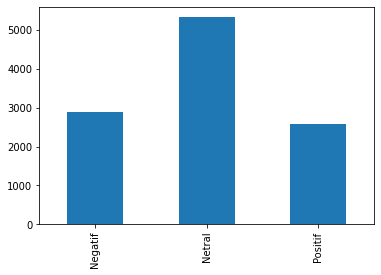

In [ ]:
#Menghitung jumlah sentiment
df['Sentimen'].value_counts().sort_index().plot.bar()

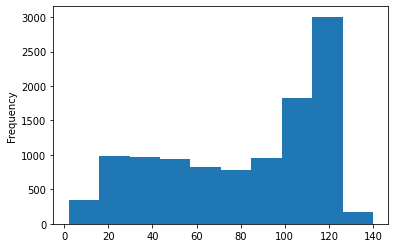

In [ ]:
#Menghitung jumlah teks
df['Teks'].str.len().plot.hist()

###Data Cleaning

In [ ]:
#Mengkodekan sentimen negatif=0 dan netral=1, positif=2
cleanup_nums = {"Sentimen":     {"Negatif": 0, "Netral": 1, "Positif":2}}
df.replace(cleanup_nums, inplace=True)
df.Sentimen.head(8)

0    0
1    0
2    2
3    2
4    0
5    1
6    0
7    2
Name: Sentimen, dtype: int64

In [ ]:
text=df['Teks'].tolist()
print(len(text))

10806


In [ ]:
y=df['Sentimen']
y=to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
df['Sentimen'].value_counts()

1    5327
0    2887
2    2592
Name: Sentimen, dtype: int64

###Data Preparation

In [ ]:
#Tokenisasi kata-kata
token =Tokenizer()
token.fit_on_texts(text)
#token.index_word

In [ ]:
#Menghitung Jumlah Kosa Kata
vocab=len(token.index_word)+1
print(vocab)

22710


In [ ]:
#Encoding kata-kata menjadi angka
encode_text=token.texts_to_sequences(text)
print(encode_text)

[[434, 1051, 11, 3, 1, 1743, 14, 9683], [5, 4557, 110, 318, 10, 660, 30, 4, 1, 2611, 37, 47, 3036, 70, 9684, 72], [291, 538, 9, 632, 2612, 999, 3656, 3657, 2613, 3658, 759, 779, 3659, 10, 1000, 2314, 132, 158, 2, 301], [704, 485, 399, 5, 82, 571, 1, 4558, 705, 3660, 31, 2], [1, 9, 410, 185, 351, 12, 383, 3, 9, 877, 18, 2614, 156, 2315, 33, 1, 1499, 337, 18, 1162], [1888, 174, 780, 7, 845, 1889, 1617, 6244, 6245, 510, 2, 25, 3661], [279, 13, 78, 14, 2065, 14, 2066, 1, 572, 358, 154, 4559, 2067, 476, 17, 42, 14, 1, 127, 251, 13, 4560, 1, 301], [15, 1, 36, 147, 83, 1744, 43, 2068, 83, 633, 83, 1744], [1, 34, 1163, 32, 1001, 100, 689, 2, 195, 15, 292], [1, 435, 18, 2069, 1317, 179, 1234, 17, 115, 1, 706, 99, 1, 351, 465, 963, 4, 465, 2316], [1164, 16, 707, 964, 3662, 32, 4561, 4562, 4563, 15, 1745, 1, 119, 87, 1318, 525, 4564, 193, 4565, 6, 808, 166, 4566, 4567], [141, 613, 690, 1, 49, 614, 257, 2615, 1399, 7, 2317], [1, 367, 6246, 3663, 3664], [43, 1500, 155, 615, 285, 3665, 3666, 9685, 1

In [ ]:
#Proses Padding
max_kata=100
X = pad_sequences(encode_text, maxlen=max_kata, padding='post')
X

array([[  434,  1051,    11, ...,     0,     0,     0],
       [    5,  4557,   110, ...,     0,     0,     0],
       [  291,   538,     9, ...,     0,     0,     0],
       ...,
       [  325,     6,   317, ...,     0,     0,     0],
       [  126,   222,    21, ...,     0,     0,     0],
       [  140,    57, 22709, ...,     0,     0,     0]], dtype=int32)

In [ ]:
#Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,test_size=0.2, stratify=y) 

In [ ]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

###Mendefinisikan Model CNN

In [ ]:
#Define CNN Model
model=Sequential()                                                                      
model.add(Embedding(vocab, 32, input_length=max_kata))                                  
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))         
model.add(Dropout(0.5))         
model.add(MaxPooling1D(pool_size=2))                                                    
model.add(Flatten())                                                                    
model.add(Dense(16, activation='relu'))                                                
model.add(Dense(3, activation='softmax'))                                               

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           726720    
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           3104      
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25616     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Melatih Model

In [ ]:
history=model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=100)

Epoch 1/100
271/271 [==============================] - 3s 11ms/step - loss: 1.0375 - accuracy: 0.4926 - val_loss: 1.0160 - val_accuracy: 0.5088
Epoch 2/100
271/271 [==============================] - 3s 10ms/step - loss: 0.8583 - accuracy: 0.6106 - val_loss: 0.9475 - val_accuracy: 0.5620
Epoch 3/100
271/271 [==============================] - 3s 10ms/step - loss: 0.4878 - accuracy: 0.8143 - val_loss: 0.9574 - val_accuracy: 0.5712
Epoch 4/100
271/271 [==============================] - 3s 10ms/step - loss: 0.2563 - accuracy: 0.9125 - val_loss: 1.1017 - val_accuracy: 0.5717
Epoch 5/100
271/271 [==============================] - 3s 10ms/step - loss: 0.1695 - accuracy: 0.9470 - val_loss: 1.1611 - val_accuracy: 0.5759
Epoch 6/100
271/271 [==============================] - 3s 10ms/step - loss: 0.1337 - accuracy: 0.9604 - val_loss: 1.2670 - val_accuracy: 0.5791
Epoch 7/100
271/271 [==============================] - 3s 10ms/step - loss: 0.1121 - accuracy: 0.9652 - val_loss: 1.3111 - val_accuracy:

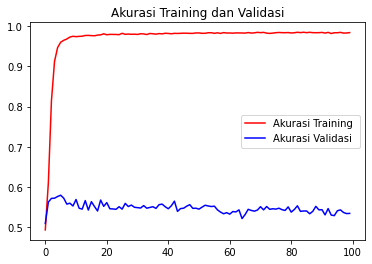

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

### Sentimen Fuzzy

In [ ]:
#Fungsi sentimen fuzzy
def single_fuzzy_sentiment_biner(txt):
  x=[txt]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  predictions=model.predict(x)
  probability=predictions[0].tolist()
  fuzzy_sentiment=0.5-((1/2)*probability[0])+((0)*probability[1])+((1/2)*probability[2])
  return fuzzy_sentiment

Pendefinisian Ulang Sentimen [0] Negatif, [0.5] Netral, [1] Positif

In [ ]:
link='https://raw.githubusercontent.com/eliyanto29/Fuzzy-Sentiment-Analisis/master/ID_Tweeter_Dataset.csv'
df=pd.read_csv(link)
#Mengkodekan sentimen negatif=0 dan netral=0.5, positif=1
cleanup_nums = {"Sentimen":     {"Negatif": 0, "Netral": 0.5, "Positif":1}}
df.replace(cleanup_nums, inplace=True)
df.Sentimen.head(8)
df.head()

,Teks,Sentimen
0,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,0.0
1,kita lanjutkan saja diam ini hingga kau dan ak...,0.0
2,doa rezeki tak putus inna haa zaa larizquna ma...,1.0
3,makasih loh ntar kita bagi hasil aku 99 9 sisa...,1.0
4,aku tak faham betul jenis orang malaysia yang ...,0.0


In [ ]:
#Menjalankan fungsi sentimen fuzzy
print(text[3])
print('Sentimen Fuzzy:')
print(single_fuzzy_sentiment_biner(text[3]))
print('Sentimen Label:')
print(df.Sentimen[3])

makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu
Sentimen Fuzzy:
0.9999999979104841
Sentimen Label:
1.0


In [ ]:
#Fungsi uji sentimen kalimat(positif atau negatif)[STANDAR]
def sentimen_analysis(x):
  x=[x]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  return model.predict_classes(x)

In [ ]:
#Menjalankan fungsi sentimen fuzzy dan standar
x=text[3]
print(x)
print('Sentimen')
print(df.Sentimen[3])
print('Sentimen analisis dengan CNN')
print(sentimen_analysis(x))
print('Fuzzy sentimen analisis dengan CNN')
single_fuzzy_sentiment_biner(x)

makasih loh ntar kita bagi hasil aku 99 9 sisanya buat kamu
Sentimen
1.0
Sentimen analisis dengan CNN
[2]
Fuzzy sentimen analisis dengan CNN


0.9999999979104841

### Evaluasi Sentimen Fuzzy

In [ ]:
#Mendefinisikan fungsi fuzzy sentimen pada satu kolom(banyak kalimat)
def fuzzy_sentimen_column(bahan):
  fuzzy_sentimen_kolom=[]
  #print(x)
  for kalimat in bahan:
    fuzzy_sentimen_kolom.append(single_fuzzy_sentiment_biner(kalimat))
    #print(fuzzy_sentimen_kolom)
  return fuzzy_sentimen_kolom

In [ ]:
#Mendefinisikan fungsi uji sentimen pada satu kolom(banyak kalimat)
def sentimen_column(bahan):
  x=token.texts_to_sequences(bahan)
  print(x)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  print(x)
  word_sentimen=model.predict_classes(x)
  word_sentimen=gabung_sublist(word_sentimen)
  return word_sentimen

In [ ]:
#Fungsi menggabung sublist
def gabung_sublist(list1):
  list2=[]
  for i in list1:
    list2.append(float(i))
  return list2

In [ ]:
#Mendefinisikan pengurangan dua list
def substract_two_list(list1,list2):
  difference = []
  zip_object = zip(list1, list2)
  for list1_i, list2_i in zip_object:
    difference.append((list1_i-list2_i)**2)
  return difference

In [ ]:
#Menghitung jarak euclid vektor sentimen(asli) dan prediksi CNN dan prediksi fuzzy sentimen
bahan=text
hasil1=fuzzy_sentimen_column(bahan)
hasil2=sentimen_column(bahan)
sentimencoba=df.Sentimen
print('Jarak Euclid Fuzzy Sentimen Analysis:')
print((abs(sum(substract_two_list(hasil1,sentimencoba))))**(0.5))
print('Jarak Euclid Sentimen Analysis Standar:')
print((abs(sum(substract_two_list(hasil2,sentimencoba))))**(0.5))
print('Contoh Nilai Fuzzy Sentiment')
print(hasil1[:8])
print('Contoh Nilai Sentiment Standar')
print(hasil2[:8])
print('Contoh Nilai Label Sentiment')
print(sentimencoba[:8])

[[434, 1051, 11, 3, 1, 1743, 14, 9683], [5, 4557, 110, 318, 10, 660, 30, 4, 1, 2611, 37, 47, 3036, 70, 9684, 72], [291, 538, 9, 632, 2612, 999, 3656, 3657, 2613, 3658, 759, 779, 3659, 10, 1000, 2314, 132, 158, 2, 301], [704, 485, 399, 5, 82, 571, 1, 4558, 705, 3660, 31, 2], [1, 9, 410, 185, 351, 12, 383, 3, 9, 877, 18, 2614, 156, 2315, 33, 1, 1499, 337, 18, 1162], [1888, 174, 780, 7, 845, 1889, 1617, 6244, 6245, 510, 2, 25, 3661], [279, 13, 78, 14, 2065, 14, 2066, 1, 572, 358, 154, 4559, 2067, 476, 17, 42, 14, 1, 127, 251, 13, 4560, 1, 301], [15, 1, 36, 147, 83, 1744, 43, 2068, 83, 633, 83, 1744], [1, 34, 1163, 32, 1001, 100, 689, 2, 195, 15, 292], [1, 435, 18, 2069, 1317, 179, 1234, 17, 115, 1, 706, 99, 1, 351, 465, 963, 4, 465, 2316], [1164, 16, 707, 964, 3662, 32, 4561, 4562, 4563, 15, 1745, 1, 119, 87, 1318, 525, 4564, 193, 4565, 6, 808, 166, 4566, 4567], [141, 613, 690, 1, 49, 614, 257, 2615, 1399, 7, 2317], [1, 367, 6246, 3663, 3664], [43, 1500, 155, 615, 285, 3665, 3666, 9685, 1

### Kesimpulan

Fuzzy Sentimen Analisis menyajikan sentimen sebuah kalimat dalam bentuk fuzzy atau derajat sentimen sebuah kalimat(tidak pasti[0 1])

**Akhir dokumen**

---